In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
path = 'https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv'

df = pd.read_csv(path) 
df.head()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


# **Part 1**

build a binary classifier model to predict the CVD Risk (Yes/No, or 1/0) using a Logistic Regression Model with the best performance possible(deliverable: Notebook)

In [ ]:
X = df.iloc[:, 1:17]
y = df.cvd_4types
model = linear_model.LogisticRegression(C=1e40, solver='newton-cg')

fitted_model = model.fit(X,y)

prediction_result = model.predict(X)
prediction_result

array([1, 0, 1, ..., 1, 1, 1])

# **Part 2**

Display the Feature Importance of all the features sorted in the order of decreasing influenceon the CVD Risk

In [ ]:
model.fit(X/np.std(X,0), y)

importance = model.coef_[0]
importance
list = []
cols = df.columns.values.tolist()
cols
  
for i,v in enumerate(importance):
  list.append([abs(v), v ,cols[i]])

list.sort(reverse=True)
list

#for i,v in enumerate(importance):
	#print('Feature: %0d, Score: %.5f' % (i,v))
 
#plt.bar([x for x in range(len(importance))], importance)
#plt.show()

[[1.136628082842035, 1.136628082842035, 'neck20'],
 [0.6095597302691247, -0.6095597302691247, 'mstat'],
 [0.37238664670276167, -0.37238664670276167, 'age_s1'],
 [0.3632416602579164, -0.3632416602579164, 'tired25'],
 [0.23556750516547292, -0.23556750516547292, 'waist'],
 [0.1855041259129585, -0.1855041259129585, 'hip'],
 [0.18301473217587705, 0.18301473217587705, 'race'],
 [0.15985758084779697, 0.15985758084779697, 'srhype'],
 [0.13711315877694763, -0.13711315877694763, 'educat'],
 [0.11777552689847041, 0.11777552689847041, 'happy25'],
 [0.08840474197875306, 0.08840474197875306, 'parrptdiab'],
 [0.08351447364003962, -0.08351447364003962, 'bend25'],
 [0.07287443927358772, 0.07287443927358772, 'tea15'],
 [0.06671029664782227, -0.06671029664782227, 'cgpkyr'],
 [0.007290488157660646, 0.007290488157660646, 'cvd_4types'],
 [0.000385735530892497, 0.000385735530892497, 'av_weight_kg']]

# **Part 3**

Evaluate the performance of your model(including ROC Curve), explain the performanceand draw a meaningful conclusion

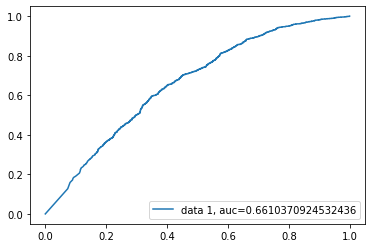

In [ ]:
y_pred_proba = model.predict_proba(X)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y,  y_pred_proba)
auc = metrics.roc_auc_score(y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC = 0.661

This is not great, as it shows that the true positive rate is only slightly higher than the false positive rate. We don't want the true positive rate to be close to equal to the false positive rate, as this implies poor accuracy of our model. Because the AUC is fairly low, we can see that our model is not a very good fit for our data. 